In [38]:
from sklearn.decomposition import IncrementalPCA
import os
import sklearn
from skimage import io
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append('../')
import torch as tc
from src.dataset.dataloader import *


In [39]:
import importlib
importlib.reload(sys.modules['src.dataset.dataloader'])
from src.dataset.dataloader import *

In [40]:
img_dir = "../data/images"
batch_size = 1000
size = 13804
dataset = CREDO_Small_Dataset(img_dir, True)
dataloader = tc.utils.data.DataLoader(dataset, batch_size = batch_size, num_workers = 2)

In [41]:
import time
import pickle as pkl
dimensions = 60
sklearn_pca = IncrementalPCA(n_components=dimensions, batch_size=1000)
#sklearn_pca = pkl.load(open("../models/model_inc_pca.pkl",'rb'))
tim = time.time()
for index, data in enumerate(dataloader):
    print(time.time()-tim)
    if index > -1:
        time1 = time.time()

        x, y, z = data[0].shape
        data_chunk = data[0].reshape(x, y*z)

        time2 = time.time()

        print(f"Czas reshape: {time2-time1}")
        sklearn_pca.partial_fit(data_chunk)

        time3 = time.time()
        print(f"Czas PCA: {time3-time2}")

        pkl.dump(sklearn_pca, open("../models/model_inc_pca.pkl","wb"))

        print(f"DONE: {(index+1)*x}/{size}")


28.816038846969604
Czas reshape: 0.001995563507080078
Czas PCA: 2.922011137008667
DONE: 1000/13804
31.749033451080322
Czas reshape: 0.0020067691802978516
Czas PCA: 2.8550050258636475
DONE: 2000/13804
35.22404742240906
Czas reshape: 0.0029976367950439453
Czas PCA: 2.989988327026367
DONE: 3000/13804
38.223034620285034
Czas reshape: 0.001998424530029297
Czas PCA: 3.211000919342041
DONE: 4000/13804
42.16704559326172
Czas reshape: 0.001997232437133789
Czas PCA: 3.4249982833862305
DONE: 5000/13804
45.600040674209595
Czas reshape: 0.0020008087158203125
Czas PCA: 3.4090018272399902
DONE: 6000/13804
49.812041997909546
Czas reshape: 0.002000570297241211
Czas PCA: 3.6349921226501465
DONE: 7000/13804
53.455039501190186
Czas reshape: 0.001998424530029297
Czas PCA: 3.1460108757019043
DONE: 8000/13804
57.290083169937134
Czas reshape: 0.0019974708557128906
Czas PCA: 3.786996841430664
DONE: 9000/13804
61.0860698223114
Czas reshape: 0.0030062198638916016
Czas PCA: 3.4959988594055176
DONE: 10000/13804
64

In [42]:
print(sum(sklearn_pca.explained_variance_ratio_))

#8 cech wyjaśnia już aż 96,08% ! (nie pamietam dokładnej metody preporecssingu)
#60 cech to dopiero 81% dla progowania (dla małego zbioru)
#60 cech to dopiero 95,92% dla całego nowego prepro (bez removedust) (dla małego zbioru)
#60 cech to dopiero 95,8% dla całego starego prepro (dla małego zbioru)
#60 cech to dopiero 97,75% dla całego nowego prepro (z removedust) (dla małego zbioru)

0.9775027241935095


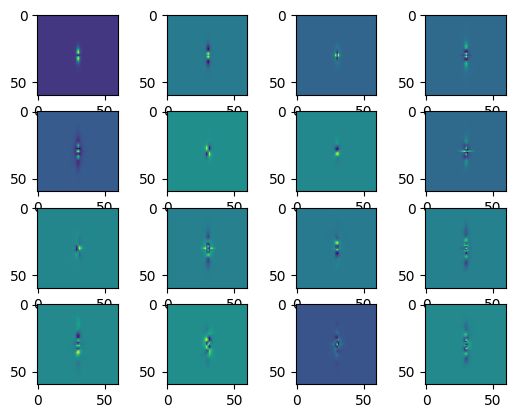

In [43]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(sklearn_pca.components_[i].reshape(60, 60))